In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

### Zadanie 1
Wczytaj zbiór danych 'tips' z biblioteki seaborn. Wyświetl pierwsze 10 wierszy tego zbioru danych, podstawowe statystyki opisowe oraz informacje o typach danych w poszczególnych kolumnach. Sprawdź, czy w zbiorze danych występują braki.

In [2]:
# Wczytanie danych i wyświetlenie pierwszych 10 wierszy
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
# Podstawowe informacje o zbiorze danych, w tym typy
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
# Statystyki opisowe dla wszystkich kolumn
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
# Liczba brakujących wartości w każdej kolumnie
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

W danych nie ma braków

### Zadanie 2
Odpowiedz na poniższe pytania dotyczące zbioru danych 'tips':
- Jaka była średnia wartość rachunku?
- Jaka była maksymalna i minimalna wartość napiwku?
- Czy palacze dają wyższe czy niższe napiwki niż niepalący?

Następnie wymyśl i odpowiedz na pięć własnych pytań dotyczących tego zbioru danych.

In [6]:
print(f'Średnia wartość rachunku: {tips["total_bill"].mean().round(2)}')

Średnia wartość rachunku: 19.79


In [7]:
print(f'Maksymalna wartość napiwku: {tips["tip"].max()}')
print(f'Minimalna wartość napiwku: {tips["tip"].min()}')

Maksymalna wartość napiwku: 10.0
Minimalna wartość napiwku: 1.0


In [8]:
tips.groupby('smoker')['tip'].mean().round(2)

smoker
Yes    3.01
No     2.99
Name: tip, dtype: float64

Nie widać istotnej różnicy w wysokości napiwków między palaczami a niepalącymi.

### Zadanie 3*

Napisz funkcje w Pythonie, która przyjmują jako argument obiekt Series z biblioteki pandas i obliczają odpowiednio kurtozę i skośność dla danej kolumny z z danymi liczbowymi ciągłymi. Przetestuj te funkcje na kolumnach 'total_bill' i 'tip' ze zbioru danych 'tips'. Jakie wnioski można wyciągnąć na podstawie otrzymanych wyników? Zweryfikuj trafność wniosków, tworząc histogramy dla tych kolumn.

In [9]:
def skewness(x: pd.Series) -> float:
    mean = x.mean()
    std = x.std()
    skew = (((x - mean) / std) ** 3).mean()
    return skew

def kurtosis(x: pd.Series, normalize: bool) -> float:
    mean = x.mean()
    std = x.std()
    kurt = (((x - mean) / std) ** 4).mean()
    if normalize:
        kurt -= 3
    return kurt

In [10]:
print(f'Skośność kolumny total_bill: {skewness(tips["total_bill"]).round(3)}')
print(f'Kurtoza kolumny total_bill (znormalizowana): {kurtosis(tips["total_bill"], normalize=True).round(3)}')

print(f'Skośność kolumny tip: {skewness(tips["tip"]).round(3)}')
print(f'Kurtoza kolumny tip (znormalizowana): {kurtosis(tips["tip"], normalize=True).round(3)}')

Skośność kolumny total_bill: 1.119
Kurtoza kolumny total_bill (znormalizowana): 1.135
Skośność kolumny tip: 1.447
Kurtoza kolumny tip (znormalizowana): 3.496


Wartości skośności i kurtozy wskazują na to, że rozkłady obu kolumn są prawoskośne i mają grubsze ogony niż rozkład normalny.
Narysujemy teraz wykresy histogramów, aby zweryfikować te wnioski.

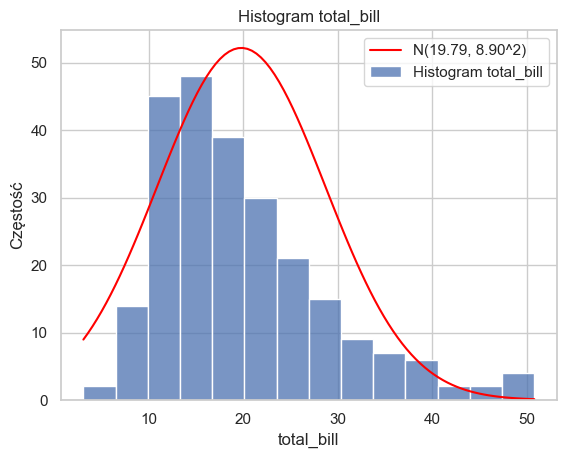

In [11]:
total_bill_mean = tips['total_bill'].mean()
total_bill_std = tips['total_bill'].std()

# Rysowanie histogramu dla kolumny total_bill
sns.histplot(tips['total_bill'])

# Dodanie gęstości normalnej z parametrami dopasowanymi do danych, odpowiednio przeskalowanej
x = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
y = (1 / (total_bill_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - total_bill_mean) / total_bill_std) ** 2)
plt.plot(x, y * len(tips) * (tips['total_bill'].max() - tips['total_bill'].min()) / 10, color='red')

plt.title('Histogram total_bill')
plt.xlabel('total_bill')
plt.ylabel('Częstość')
plt.legend([f'N({total_bill_mean:.2f}, {total_bill_std:.2f}^2)', 'Histogram total_bill'])
plt.show()

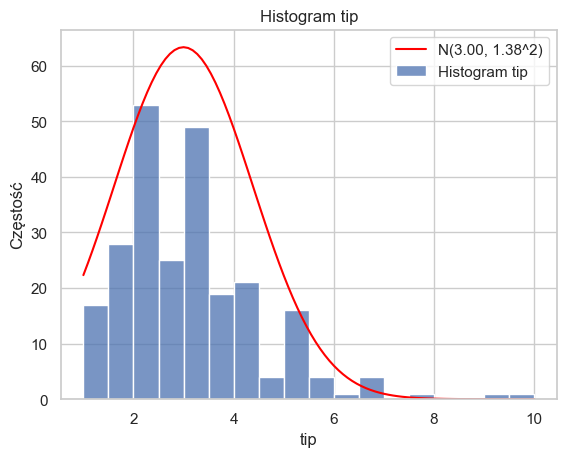

In [12]:
tip_mean = tips['tip'].mean()
tip_std = tips['tip'].std()

# Rysowanie histogramu dla kolumny tip
sns.histplot(tips['tip'])

# Dodanie gęstości normalnej z parametrami dopasowanymi do danych, odpowiednio przeskalowanej
x = np.linspace(tips['tip'].min(), tips['tip'].max(), 100)
y = (1 / (tip_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - tip_mean) / tip_std) ** 2)
plt.plot(x, y * len(tips) * (tips['tip'].max() - tips['tip'].min()) / 10, color='red')

plt.title('Histogram tip')
plt.xlabel('tip')
plt.ylabel('Częstość')
plt.legend([f'N({tip_mean:.2f}, {tip_std:.2f}^2)', 'Histogram tip'])
plt.show()